In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json
import config

apikey = getattr(config, 'apikey', 'no_key_found')


'567186234c3bc18fc3c08fd04b437a5c0cb76ce9'

In [2]:

summary_response = requests.get(f'http://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key={apikey}')
summary_dict = summary_response.json()
summary = pd.DataFrame.from_dict(summary_dict)
summary.columns=summary.iloc[0]
summary = summary.drop(summary.index[0])
summary = summary[['NAME','NAICS2017_LABEL','SEX_LABEL','ETH_GROUP_LABEL','RACE_GROUP_LABEL','VET_GROUP_LABEL','EMPSZFI_LABEL','YEAR','FIRMPDEMP','RCPPDEMP','EMP','PAYANN','us']]



[Text(0.5, 1.0, 'Number of Employer Firms by Race Group and Size'),
 Text(0.5, 15.0, 'Size'),
 Text(32.999999999999986, 0.5, 'Race Group')]

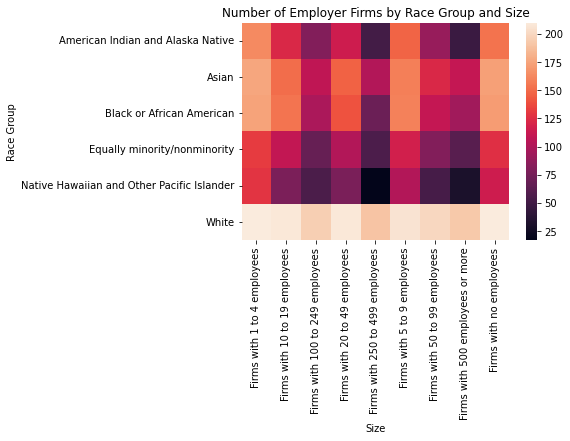

In [6]:
summary_race = summary.copy()
summary_race = summary_race[summary_race['EMPSZFI_LABEL'] != 'All firms'].copy()
summary_race = summary_race[summary_race['RACE_GROUP_LABEL'] != 'Total'].copy()
summary_race = summary_race[(summary_race['RACE_GROUP_LABEL'] != 'Classifiable')&(summary_race['RACE_GROUP_LABEL'] != 'Unclassifiable')].copy()
summary_race = summary_race[(summary_race['RACE_GROUP_LABEL'] != 'Minority')&(summary_race['RACE_GROUP_LABEL'] != 'Nonminority')].copy()

summary_race['FIRMPDEMP']=summary_race['FIRMPDEMP'].astype(float)

summary_pivot = summary_race.pivot_table(index='RACE_GROUP_LABEL',columns ='EMPSZFI_LABEL', values='FIRMPDEMP',aggfunc='size')
sns.heatmap(summary_pivot).set(title = 'Number of Employer Firms by Race Group and Size', xlabel='Size',ylabel = 'Race Group')


<function matplotlib.pyplot.show(close=None, block=None)>

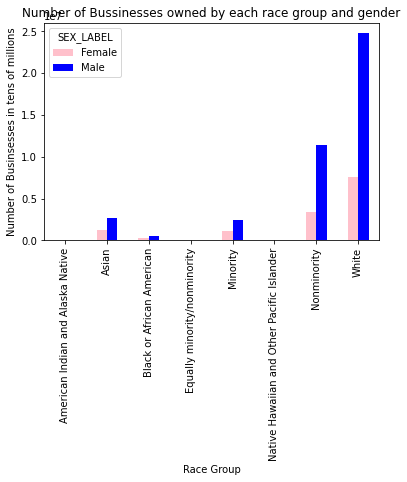

In [16]:
summary_gender = summary[['SEX_LABEL','RACE_GROUP_LABEL','FIRMPDEMP']].copy()
summary_gender = summary_gender[(summary_gender['SEX_LABEL']=='Male')|(summary_gender['SEX_LABEL']=='Female')]
summary_gender = summary_gender[summary_gender['RACE_GROUP_LABEL']!='Total']

summary_gender['FIRMPDEMP']=summary_gender['FIRMPDEMP'].astype('float')
summary_pivot = summary_gender.pivot_table(index='RACE_GROUP_LABEL',columns ='SEX_LABEL', values='FIRMPDEMP',aggfunc='sum')



ax = summary_pivot.plot(title='Number of Bussinesses owned by each race group and gender',kind='bar',color=['pink','blue'])
ax.set_xlabel('Race Group')
ax.set_ylabel('Number of Businsesses in tens of millions')

plt.show

[Text(0.5, 1.0, 'Annual Payroll for Minority and Non-Minority Owned Businesses'),
 Text(0.5, 0, 'Race Group'),
 Text(0, 0.5, 'Annual Payroll (millions of USD)')]

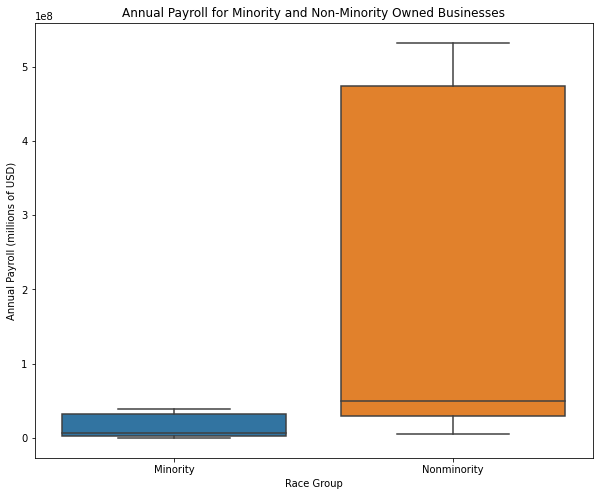

In [18]:
summary['PAYANN']=summary['PAYANN'].astype(float)
summary_size=summary[(summary['NAICS2017_LABEL']=='Total for all sectors') & (summary['PAYANN']>0)]
summary_size=summary_size[summary_size['EMPSZFI_LABEL']=='Firms with 500 employees or more']
summary_size=summary_size[(summary_size['RACE_GROUP_LABEL']=='Minority')|(summary_size['RACE_GROUP_LABEL']=='Nonminority')]
summary_size['PAYANN']=summary_size['PAYANN'].astype(float)

plt.figure(figsize=(10,8))
sns.boxplot(x='RACE_GROUP_LABEL',y='PAYANN',data=summary_size).set(title='Annual Payroll for Minority and Non-Minority Owned Businesses', xlabel='Race Group', ylabel = 'Annual Payroll (millions of USD)')